In [127]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [66]:
# return a 5x5 identiy matrix
def warmUpExercise():
    return np.eye(5, dtype='int')

In [67]:
warmUpExercise()

array([[1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1]])

In [68]:
# Compute cost for linear regression
# J = COMPUTECOST(X, y, theta) computes the cost of using theta as the
#   parameter for linear regression to fit the data points in X and y
def computeCost(X, y, theta):
    # Initialize some useful values
    m = len(y) # number of training examples
    J = 0
    
    cumulative = 0
    for i in range(0, m):
        cumulative += (theta[0][0] + theta[1][0] * X[i][1] - y[i][0])**2 #sum from 1 to m of (prediction - actual)^2
    
    J = 1/(2*m) * cumulative; #cost function
    

    return J

In [69]:
#GRADIENTDESCENT Performs gradient descent to learn theta
#   theta = GRADIENTDESCENT(X, y, theta, alpha, num_iters) updates theta by 
#   taking num_iters gradient steps with learning rate alpha
#   
#   Not a vectorized implementation
def gradientDescent(X, y, theta, alpha, num_iters):
    
    m = len(y); # number of training examples
    J_history = np.zeros((num_iters, 1))

    for iter in range(1, num_iters):
        
        sum1 = 0
        sum2 = 0
        for i in range(0, m):
            sum1 = sum1 + (theta[0][0] + theta[1][0] * X[i][1] - y[i][0])  #sum of 1 to m of partial derivatice of cost function with regards to x1
            sum2 = sum2 + (theta[0][0] + theta[1][0] * X[i][1] - y[i][0])* X[i][1] #sum of 1 to m of partial derivative of cost function with regards to x2
                                            
        theta[0][0] = theta[0][0] - alpha * 1/m  * sum1 #each step theta[0,0] takes a step towards direction
        theta[1][0] = theta[1][0] - alpha * 1/m  * sum2 #each step theta[1,0] takes a step towards direction

        J_history[iter] = computeCost(X, y, theta)
                           
    return theta, J_history

In [70]:
data = np.loadtxt('ex1data1.txt', delimiter=',')

X = np.array(np.matrix(data[:,0]).transpose())
y = np.array(np.matrix(data[:,1]).transpose())


#X
#y[0][0]


In [71]:
#PLOTDATA Plots the data points x and y into a new figure 
#  PLOTDATA(x,y) plots the data points and gives the figure axes labels of
#   population and profit.
def plotData(x, y):
    plt.plot(x, y, 'rx', label='Training Data') #Plot the data
    plt.ylabel('Profit in $10,000s'); #Set the y-axis label
    plt.xlabel('Population of City in 10,000s'); # Set the x-axis label
    

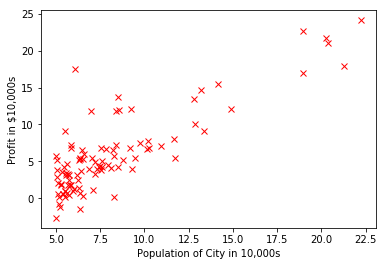

In [72]:
plotData(X,y)

In [73]:
m = len(X) # number of training examples
X = np.array(np.matrix(data[:,0]).transpose())
X = np.c_[np.ones((m, 1)), X] # Add a column of ones to x
theta = np.zeros((2, 1)) # initialize theta with fitting parameters
iterations = 1500
alpha = 0.01

computeCost(X, y, theta) #
computeCost(X, y, np.array([[-1],[2]])) #52.2425

end_theta, J_hist = gradientDescent(X, y, theta, alpha, iterations)

end_theta

array([[-3.62981201],
       [ 1.16631419]])

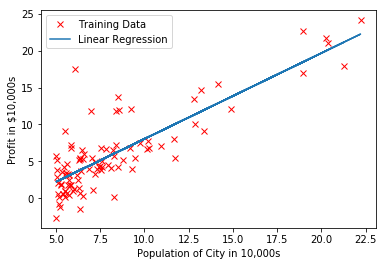

In [74]:
plotData(X[:,1],y)  #graphing all the points in X with respect to y
plt.plot(X[:,1], X.dot(theta), '-', label='Linear Regression') #graphing the linear regression line
plt.legend()

In [75]:
# Predict values for population sizes of 35,000 and 70,000
predict1 = np.array([1, 3.5]).dot(theta)[0]
print('For population = 35,000, we predict a profit of {:f}.'.format(predict1*10000))
predict2 = np.array([1, 7]).dot(theta)[0]
print('For population = 70,000, we predict a profit of {:f}.'.format(predict2*10000))


For population = 35,000, we predict a profit of 4522.876458.
For population = 70,000, we predict a profit of 45343.872966.


Text(0.5, 0, '$\\Theta_1$')

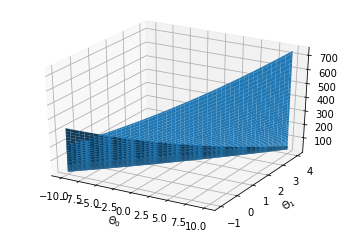

In [76]:
from mpl_toolkits.mplot3d import Axes3D  
# Axes3D import has side effects, it enables using projection='3d' in add_subplot


# Visualizing J(theta_0, theta_1): 
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-1, 4, 100)

# initialize J_vals to a matrix of 0's
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))


# Fill out J_vals
for i in range(0,len(theta0_vals)):
    for j in range (0,len(theta1_vals)):
        t = np.array( [[theta0_vals[i]], [theta1_vals[j]]]) 
        J_vals[i][j] = computeCost(X, y, t)
        #print(i , j)

#Because of the way meshgrids work in the surf command, we need to 
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals.transpose()

#Surface Plot for python
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals)
ax.set_xlabel('$\Theta_0$')
ax.set_ylabel('$\Theta_1$')


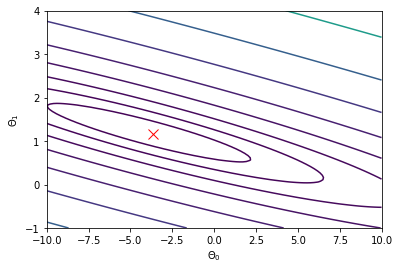

In [77]:
plt.contour(theta0_vals, theta1_vals, J_vals, np.logspace(-2, 3, 20))
plt.xlabel('$\Theta_0$')
plt.ylabel('$\Theta_1$')
plt.plot(theta[0][0], theta[1][0], 'rx', markersize=10, linewidth=2)

In [78]:
# Load data
data = np.loadtxt('ex1data2.txt', delimiter=',')

X = np.array(np.matrix( [data[:,0], data[:,1]] ).transpose())
y = np.array(np.matrix(data[:,2]).transpose())
m = len(y)


In [79]:
# featureNormalize and Scaling
#FEATURENORMALIZE Normalizes the features in X 
#   FEATURENORMALIZE(X) returns a normalized version of X where
#   the mean value of each feature is 0 and the standard deviation
#   is 1. This is often a good preprocessing step to do when
#   working with learning algorithms.
def featureNormalize(X):
    X_norm = X
    mu = np.zeros( (1, len(X[0]) ) )
    sigma = np.zeros( (1, len(X[0] ) ) )
    
    for i in range(0,len(X[0])):
        mu[0][i] = np.mean(X[:,i]) # mean of each feature
        sigma[0][i] = np.std(X[:,i], ddof=1) #standard devitation of each feature
        X_norm[:,i] = (X[:,i] - mu[0][i])/sigma[0][i] #normalize X by (x - mean)/std
        
    return X_norm, mu, sigma


In [80]:
# Load data
data = np.loadtxt('ex1data2.txt', delimiter=',')

X = np.array(np.matrix( [data[:,0], data[:,1]] ).transpose())
y = np.array(np.matrix(data[:,2]).transpose())
m = len(y)

X_norm, mu, sigma = featureNormalize(X)

#X_norm
#sigma
#mu

In [81]:
#COMPUTECOSTMULTI Compute cost for linear regression with multiple variables
#   J = COMPUTECOSTMULTI(X, y, theta) computes the cost of using theta as the
#   parameter for linear regression to fit the data points in X and y
def computeCostMulti(X, y, theta):
    m = len(y); # number of training examples
    
    # original cost function formula vectorized implementation
    #J = 1/(2*m) * transpose( (X*theta)-y ) * ( (X*theta)-y); 

    
    B = (X.dot(theta))-y; # X * theta gives you the predictions - y (actual)
    B_t = np.array(np.transpose( np.matrix(B) )) #B transpose
    
    J = 1/(2*m) * B_t.dot( B )[0][0]  #vectorization of cost function
    #transpose(B) * B gives you the sum of 1to m (prediction - y)^2 

    return J


In [82]:
#GRADIENTDESCENTMULTI Performs gradient descent to learn theta
#   theta = GRADIENTDESCENTMULTI(x, y, theta, alpha, num_iters) updates theta by
#   taking num_iters gradient steps with learning rate alpha

def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = len(y) # number of training examples
    J_history = np.zeros((num_iters, 1))

    for iter in range(0, num_iters):
        
        cumulative = np.zeros( (len(X[0]), 1 )) # len(X[0]) is the number of features
        for i in range(0, m):
            cumulative = cumulative + np.array(np.transpose(np.matrix((X[i,:].dot(theta) - y[i])*X[i,:]))) # sum is a vector with size = # of features
        # (X(i,:) * theta - y(i)) represents the prediction - actual (a real number)
        # transpose(X(i,:) is the vector form of each features  
        
        
        delta = 1/m * cumulative
        
        #print(delta)
    
        theta = theta - alpha * delta #vectorization, each theta is moving towards each respective direction in delta
    

        J_history[iter] = computeCostMulti(X, y, theta)
                
    return theta

In [83]:
X = np.array(np.matrix( [data[:,0], data[:,1]] ).transpose())
X_norm, mu, sigma = featureNormalize(X)

X = np.c_[np.ones((m, 1)), X_norm] # Add a column of ones to x


alpha = 0.1
num_iters = 400



#Init Theta and Run Gradient Descent 
theta = np.zeros((3, 1)) # initialize theta with fitting parameters

theta = gradientDescentMulti(X, y, theta, alpha, num_iters)

theta


#np.array(np.transpose(np.matrix(X[1,:].dot(theta) - y[1] * (X[1,:]))))

#np.zeros( (len(X[0]),1 ) )

#B = X.dot(theta) - y
#B_t = np.array(np.transpose( np.matrix(B) ))
#B.shape
#B_t.dot(B)

#computeCostMulti(X, y, theta)


array([[ 340412.65957447],
       [ 110631.04895815],
       [  -6649.47295013]])

In [133]:
#Estimate the price of a 1650 sq-ft, 3 br house

#Predict prcie of house for 1650 sq-ft and 3br
est = np.array( [1650, 3] )

norm = np.c_[1, (est - mu)/sigma]

price = norm.dot(theta)[0][0]

#price
print('Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): ${:f}.'.format(price));

Predicted price of a 1650 sq-ft, 3 br house (using gradient descent): $293081.464622.


In [105]:
#NORMALEQN Computes the closed-form solution to linear regression 
#   NORMALEQN(X,y) computes the closed-form solution to linear 
#   regression using the normal equations.
def normalEqn(X, y):
    theta = np.zeros( (len(X[0]), 1) ) 
    
    X_t = np.transpose(X) # X's transpose

    theta = (np.linalg.inv(X_t.dot(X))).dot(X_t).dot(y) #normal Equation (X_t * X)^(-1) * X_t * y
    
    return theta


In [140]:
# Normal Equation
data = np.loadtxt('ex1data2.txt', delimiter=',')

X_normal = np.array(np.matrix( [data[:,0], data[:,1]] ).transpose())
y_normal = np.array(np.matrix(data[:,2]).transpose())
m = len(y_normal)

X_normal = np.c_[np.ones((m, 1)), X_normal] # Add a column of ones to x

theta_normal = normalEqn(X_normal, y_normal)

#theta_normal
print('Theta computed from the normal equations: \n', theta_normal);

Theta computed from the normal equations: 
 [[ 89597.9095428 ]
 [   139.21067402]
 [ -8738.01911233]]


In [143]:
est = np.array([1, 1650, 3])
price = est.dot(theta

price
#print('Predicted price of a 1650 sq-ft, 3 br house (using normal equations): ${:f}.'.format(price));

array([  1.82861695e+08])